In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.0 Visualização rápida.

Faremos uma visualização rápidas nas variáveis presentes no DataFrame.
Através delas teremos insights e possíveis tomadas de decisões.

Além disso, esta simples visualização  nos permitirá identificar boas variáveis preditoras e possíveis caminhos a tomar.




In [2]:
df=pd.read_csv('dataframe_exercicio_modulo_9.csv')

In [3]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   schoolsup   1044 non-null   object
 7   famsup      1044 non-null   object
 8   paid        1044 non-null   object
 9   activities  1044 non-null   object
 10  internet    1044 non-null   object
 11  romantic    1044 non-null   object
 12  famrel      1044 non-null   int64 
 13  freetime    1044 non-null   int64 
 14  goout       1044 non-null   int64 
 15  absences    1044 non-null   int64 
 16  G3          1044 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 138.8+ KB


In [5]:
df.shape

(1044, 17)

De maneira imediata notamos que não existe dados faltantes, isso é muito bom, não será necessário a exclusão de nenhuma linha ou coluna.

Apesar disso, o fato de nao haver variáveis com dados faltantes não é sinônimo dos dados estarem prontos para serem trabalhados.

In [6]:
df.describe()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,3.935824,3.201149,3.156130,4.434866,11.341954
std,1.239975,0.731727,0.834353,0.933401,1.031507,1.152575,6.210017,3.864796
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,17.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,18.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000


**age**: a idade dos alunos está concentrada entre 15 e 18 anos. 75% dos alunos possuem idade entre 15 e 18 anos.

**traveltime**: 75% dos alunos levam menos de 30 minutos no trajeto escola-casa.

**studytime**:75% dos alunos estudam ente 0 e 5 horas por semana.

**famrel**: Grande parte dos alunos declararam ter uma relação boa com a familía.

**freetime**: a média dos alunos declara ter um tempo razoável disponível nos periodos pós aulas.

**goout**: a média dos alunos declara tem uma relação com os amigos razoavel, isto é, costumam sair com frequência.

**absences**: 75% dos alunos possuem menos de 6 faltas, apesar disto pode-se notar algum outlier nesta variável com 75 faltas.

**G3**: a nota final média dos alunos fica entre  11, de um máximo de 20. Sendo que 75% dos alunos possuem G3 abaixo de 14.



In [7]:
for x in df.describe().columns:
    print('Correlação da variável %s com a Média final.'%x,round(df['%s'%x].corr(df.G3),4))

Correlação da variável age com a Média final. -0.1253
Correlação da variável traveltime com a Média final. -0.1026
Correlação da variável studytime com a Média final. 0.1616
Correlação da variável famrel com a Média final. 0.0545
Correlação da variável freetime com a Média final. -0.0649
Correlação da variável goout com a Média final. -0.0979
Correlação da variável absences com a Média final. -0.0457
Correlação da variável G3 com a Média final. 1.0


De posse das correlações anteriores vemos que as melhores variáveis para trabalharmos são:

studytime, age e traveltime.

Apesar disto, teremos que fazer o pré-processamento de outras variáveis qualitativas para checarmos melhor tal correlação.

# 2.0 ) Pré-processamento.

Faremos o pré-processamento das variáveis presentes neste dataset, de posse disto analisaremos novamente a correlação e se esta variável nos auxiliará na previsão da média final, ou não.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   schoolsup   1044 non-null   object
 7   famsup      1044 non-null   object
 8   paid        1044 non-null   object
 9   activities  1044 non-null   object
 10  internet    1044 non-null   object
 11  romantic    1044 non-null   object
 12  famrel      1044 non-null   int64 
 13  freetime    1044 non-null   int64 
 14  goout       1044 non-null   int64 
 15  absences    1044 non-null   int64 
 16  G3          1044 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 138.8+ KB


# 2.1) sex

Transformaremos a variável sex, Sexo de cada aluno em uma variável binária, atribuindo os seguintes valores:

0:Mulher

1:Homem

Além disso, geraremos uma nova variável "sex_bin" onde armazenaremos tais informações.

In [9]:
df.sex

0       F
1       F
2       F
3       F
4       F
       ..
1039    F
1040    F
1041    F
1042    M
1043    M
Name: sex, Length: 1044, dtype: object

In [10]:
def sex_bin(x):
    if x=='F':
        return 0
    if x=='M':
        return 1
df.sex.apply(lambda x: sex_bin(x))

0       0
1       0
2       0
3       0
4       0
       ..
1039    0
1040    0
1041    0
1042    1
1043    1
Name: sex, Length: 1044, dtype: int64

In [11]:
df['sex_bin']=df.sex.apply(lambda x: sex_bin(x))

In [12]:
df.head(10)

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3,sex_bin
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6,0
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6,0
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10,0
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15,0
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10,0
5,M,16,LE3,T,1,2,no,yes,yes,yes,yes,no,5,4,2,10,15,1
6,M,16,LE3,T,1,2,no,no,no,no,yes,no,4,4,4,0,11,1
7,F,17,GT3,A,2,2,yes,yes,no,no,no,no,4,1,4,6,6,0
8,M,15,LE3,A,1,2,no,yes,yes,no,yes,no,4,2,2,0,19,1
9,M,15,GT3,T,1,2,no,yes,yes,yes,yes,no,5,5,1,0,15,1


In [13]:
df.sex_bin.value_counts()

0    591
1    453
Name: sex_bin, dtype: int64

Vemos que o sexo com maior presença neste dataset é o feminino, isto quer dizer, há mais mulheres do que homens na escola.

# 2.2) famsize

Faremos o pré-processamento da variável famsize, que nos indica o tamanho da família.

LE3: indica famílias com no máximo 3 pessoas.

GT3:Indica famílias com mais de 3 pessoas.

Criaremos a variável famsize_bin onde:

0: GT3

1: LE3

In [14]:
def famsize_bin(x):
    if x=='GT3':
        return 0
    if x=='LE3':
        return 1


In [15]:
df['famsize_bin']=df.famsize.apply(lambda x: famsize_bin(x))

In [16]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3,sex_bin,famsize_bin
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6,0,0
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6,0,0
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10,0,1
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15,0,0
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10,0,0


In [17]:
df.famsize_bin.value_counts()/df.shape[0]



0    0.706897
1    0.293103
Name: famsize_bin, dtype: float64

Vemos que a maior parte dos alunos (70%) possui uma família composta por mais de 3 pessoas.


# 2.3) Pstatus

A variável Pstatus indica o status da habitação com os pais.

Se T: Mora junto com os pais.

Se A: Mora separado dos pais.

A transformaremos numa variável binária onde:

T:0

A:1

E Além disso, armazenaremos tais informações na variável Pstatus_bin.

In [18]:
def pstatus_bin(x):
    if x=='T':
        return 0
    if x=='A':
        return 1

In [19]:
df['Pstatus_bin']=df.Pstatus.apply(lambda x: pstatus_bin(x))

In [20]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3,sex_bin,famsize_bin,Pstatus_bin
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6,0,0,1
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6,0,0,0
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10,0,1,0
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15,0,0,0
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10,0,0,0


In [21]:
df.Pstatus_bin.value_counts()/df.shape[0]

0    0.8841
1    0.1159
Name: Pstatus_bin, dtype: float64

Notamos que aproximadamente 89% dos alunos moram com os pais.

Apenas 11% moram sozinhos.

# 2.4) (schoolsup	famsup	paid	activities	internet	romantic)

Tais variáveis acimas por serem da mesma forma, com alternativas de "yes" ou "no" resolveremos de uma vez só.

no:0

yes:1

In [22]:
def change_yn(x):
    if x=='yes':
        return 1
    if x=='no':
        return 0


In [23]:
df['schoolsup_bin']=df.schoolsup.apply(lambda x: change_yn(x))
df['famsup_bin']=df.famsup.apply(lambda x: change_yn(x))
df['paid_bin']=df.paid.apply(lambda x: change_yn(x))
df['activities_bin']=df.activities.apply(lambda x: change_yn(x))
df['internet_bin']=df.internet.apply(lambda x: change_yn(x))
df['romantic_bin']=df.romantic.apply(lambda x: change_yn(x))

In [24]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,...,G3,sex_bin,famsize_bin,Pstatus_bin,schoolsup_bin,famsup_bin,paid_bin,activities_bin,internet_bin,romantic_bin
0,F,18,GT3,A,2,2,yes,no,no,no,...,6,0,0,1,1,0,0,0,0,0
1,F,17,GT3,T,1,2,no,yes,no,no,...,6,0,0,0,0,1,0,0,1,0
2,F,15,LE3,T,1,2,yes,no,yes,no,...,10,0,1,0,1,0,1,0,1,0
3,F,15,GT3,T,1,3,no,yes,yes,yes,...,15,0,0,0,0,1,1,1,1,1
4,F,16,GT3,T,1,2,no,yes,yes,no,...,10,0,0,0,0,1,1,0,0,0


In [25]:
df.schoolsup_bin.value_counts()/df.shape[0]

0    0.886015
1    0.113985
Name: schoolsup_bin, dtype: float64

A variável schoolsup nos indica se o aluno possui ou não suporte extra escolar.

Apenas 11% dos alunos possui um suporte extra escolar.

In [26]:
df.famsup_bin.value_counts()/df.shape[0]

1    0.613027
0    0.386973
Name: famsup_bin, dtype: float64

A variável famsup nos indica se o aluno possui ou não suporte educacional da família.

38% dos alunos apresentam possuir um suporte educacional da família.

In [27]:
df.paid_bin.value_counts()/df.shape[0]

0    0.789272
1    0.210728
Name: paid_bin, dtype: float64

a variável paid nos mostra se o aluno pagou ou não aulas particulares por fora.

21% dos alunos disseram que já pagaram aulas particulares por fora.

In [28]:
df.activities_bin.value_counts()/df.shape[0]

0    0.505747
1    0.494253
Name: activities_bin, dtype: float64

A variável activities demonstra se o aluno participa ou não de atividades extracurriculares.

Nota-se que 49% dos alunos participam de atividades extracurriculares.


In [29]:
df.internet_bin.value_counts()/df.shape[0]

1    0.792146
0    0.207854
Name: internet_bin, dtype: float64

a variável internet nos mostra se o aluno possui ou não acesso a internet em casa.

20% dos alunos declararam não possuir acesso a internet em casa.

In [30]:
df.romantic_bin.value_counts()/df.shape[0]

0    0.644636
1    0.355364
Name: romantic_bin, dtype: float64

A variável romantic nos indica se o aluno está ou não num relacionamento.

35% dos alunos estão num relacionamento.

# 3.0) Correlações.

Faremos agora uma nova checagem da correlação  entre as variáveis preditoras e a nossa variável target (G3).

In [31]:
for x in df.describe().columns:
    print('Correlação da variável %s com a Média final.'%x,round(df['%s'%x].corr(df.G3),4))

Correlação da variável age com a Média final. -0.1253
Correlação da variável traveltime com a Média final. -0.1026
Correlação da variável studytime com a Média final. 0.1616
Correlação da variável famrel com a Média final. 0.0545
Correlação da variável freetime com a Média final. -0.0649
Correlação da variável goout com a Média final. -0.0979
Correlação da variável absences com a Média final. -0.0457
Correlação da variável G3 com a Média final. 1.0
Correlação da variável sex_bin com a Média final. -0.0315
Correlação da variável famsize_bin com a Média final. 0.0612
Correlação da variável Pstatus_bin com a Média final. 0.0307
Correlação da variável schoolsup_bin com a Média final. -0.0793
Correlação da variável famsup_bin com a Média final. 0.0133
Correlação da variável paid_bin com a Média final. -0.0494
Correlação da variável activities_bin com a Média final. 0.034
Correlação da variável internet_bin com a Média final. 0.1071
Correlação da variável romantic_bin com a Média final. -0.0

Vemos que as melhores variáveis para se usar como preditoras por possuir melhores correlações são:

studytime, age, traveltime, internet_bin e romantic_bin.

as usaremos como preditoras.

# 4.0) Regressão.

De posse das variáveis preditoras anteriormente citadas studytime, age, traveltime, internet_bin e romantic_bin.

Faremos a previsão da variável target (G3) para prever a média final do aluno.

Mas antes teremos que efetuar a separação dos dados. Por ser um dataframe com dimensões pequenas e poucos dados faremos a separação da forma:

75%: Treino

25:Teste

não usaremos a validação pois possuimos poucos dados.

# 4.1) Divisão do dataframe.

In [32]:
df_train=df[0:int(df.shape[0]*0.75)]
df_test=df[int(df.shape[0]*0.75):df.shape[0]]

In [33]:
df_train.shape

(783, 26)

In [34]:
df_test.shape

(261, 26)

# 4.2) Métricas de desempenho.

Criaremos a função RMSE() a fim de conseguir medir o desempenho de cada modelo.


In [35]:
def RMSE(y,y_pred):
    MSE=(y-y_pred)**2
    return np.mean((MSE)**0.5)

# 4.3 Comparando os modelos com base na regressão linear.

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
x_train1=df_train['studytime'].values.reshape(-1,1)
x_train2=df_train['age'].values.reshape(-1,1)
x_train3=df_train['traveltime'].values.reshape(-1,1)
x_train4=df_train['internet_bin'].values.reshape(-1,1)
x_train5=df_train['romantic_bin'].values.reshape(-1,1)



y_target1=df_train['G3']

In [39]:
lr.fit(x_train1,y_target1)

LinearRegression()

In [40]:
y_pred1=lr.predict(x_train1)

In [41]:
lr.fit(x_train2,y_target1)

LinearRegression()

In [42]:
y_pred2=lr.predict(x_train2)

In [43]:
lr.fit(x_train3,y_target1)

LinearRegression()

In [44]:
y_pred3=lr.predict(x_train3)

In [45]:
lr.fit(x_train4,y_target1)

LinearRegression()

In [46]:
y_pred4=lr.predict(x_train4)

In [47]:
lr.fit(x_train5,y_target1)

LinearRegression()

In [48]:
y_pred5=lr.predict(x_train5)

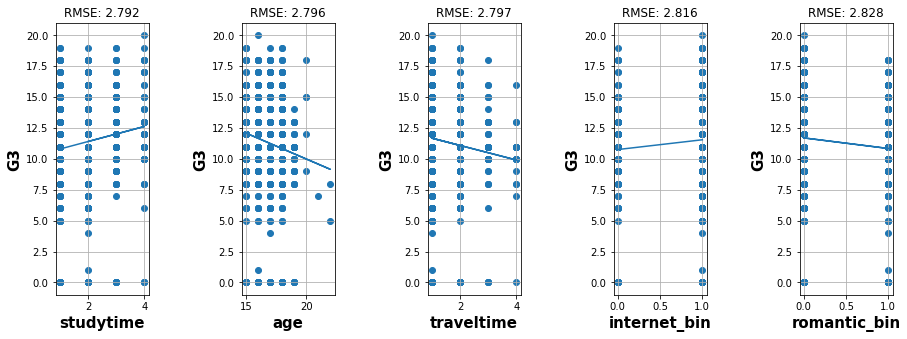

In [49]:
fig=plt.figure(figsize=[15,5])
plt.subplots_adjust(wspace=1)

plt.subplot(1,5,1)
plt.grid(True)
plt.scatter(df_train['studytime'],y_target1)
plt.title('RMSE: %s'%round(RMSE(y=y_target1,y_pred=y_pred1),3))
plt.plot(x_train1,y_pred1)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('studytime',fontweight='bold',fontsize=15)


plt.subplot(1,5,2)
plt.grid(True)

plt.scatter(df_train['age'],y_target1)
plt.title('RMSE: %s'%round(RMSE(y=y_target1,y_pred=y_pred2),3))
plt.plot(x_train2,y_pred2)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('age',fontweight='bold',fontsize=15)


plt.subplot(1,5,3)
plt.grid(True)

plt.scatter(x_train3,y_target1)
plt.title('RMSE: %s'%round(RMSE(y=y_target1,y_pred=y_pred3),3))
plt.plot(x_train3,y_pred3)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('traveltime',fontweight='bold',fontsize=15)

plt.subplot(1,5,4)
plt.grid(True)

plt.scatter(x_train4,y_target1)
plt.title('RMSE: %s'%round(RMSE(y=y_target1,y_pred=y_pred4),3))
plt.plot(x_train4,y_pred4)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('internet_bin',fontweight='bold',fontsize=15)


plt.subplot(1,5,5)
plt.grid(True)

plt.scatter(x_train5,y_target1)
plt.title('RMSE: %s'%round(RMSE(y=y_target1,y_pred=y_pred5),3))
plt.plot(x_train5,y_pred5)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('romantic_bin',fontweight='bold',fontsize=15)

plt.show()

# 4.4) Teste!

Agora que os modelos já foram treinados e além disso, possuiram métricas muito semelhantes umas das outras, daremos continuidade ao processo de teste com todos os modelos e checar quais são aqueles que estão fittando.

De imediato notamos que a variável studytime é a que consegue prever com maior eficiência, mas até o momento é só uma hipótese.

In [50]:
x_test1=df_test['studytime'].values.reshape(-1,1)
x_test2=df_test['age'].values.reshape(-1,1)
x_test3=df_test['traveltime'].values.reshape(-1,1)
x_test4=df_test['internet_bin'].values.reshape(-1,1)
x_test5=df_test['romantic_bin'].values.reshape(-1,1)



y_target2=df_test['G3']

In [51]:
lr.fit(x_test1,y_target2)

LinearRegression()

In [52]:
y_predtest1=lr.predict(x_test1)

In [53]:
lr.fit(x_test2,y_target2)

LinearRegression()

In [54]:
y_predtest2=lr.predict(x_test2)

In [55]:
lr.fit(x_test2,y_target2)

LinearRegression()

In [56]:
lr.fit(x_test3,y_target2)

LinearRegression()

In [57]:
y_predtest3=lr.predict(x_test3)

In [58]:
lr.fit(x_test4,y_target2)

LinearRegression()

In [59]:
y_predtest4=lr.predict(x_test4)

In [60]:
lr.fit(x_test5,y_target2)

LinearRegression()

In [61]:
y_predtest5=lr.predict(x_test5)

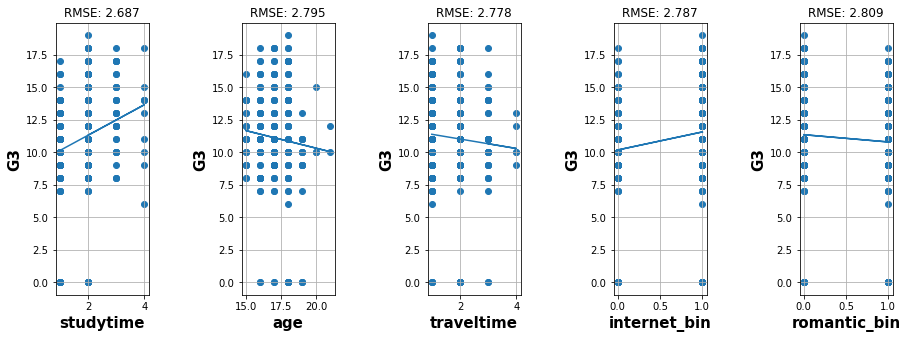

In [62]:
fig=plt.figure(figsize=[15,5])
plt.subplots_adjust(wspace=1)

plt.subplot(1,5,1)
plt.grid(True)
plt.scatter(df_test['studytime'],y_target2)
plt.title('RMSE: %s'%round(RMSE(y=y_target2,y_pred=y_predtest1),3))
plt.plot(x_test1,y_predtest1)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('studytime',fontweight='bold',fontsize=15)


plt.subplot(1,5,2)
plt.grid(True)

plt.scatter(df_test['age'],y_target2)
plt.title('RMSE: %s'%round(RMSE(y=y_target2,y_pred=y_predtest2),3))
plt.plot(x_test2,y_predtest2)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('age',fontweight='bold',fontsize=15)


plt.subplot(1,5,3)
plt.grid(True)

plt.scatter(x_test3,y_target2)
plt.title('RMSE: %s'%round(RMSE(y=y_target2,y_pred=y_predtest3),3))
plt.plot(x_test3,y_predtest3)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('traveltime',fontweight='bold',fontsize=15)

plt.subplot(1,5,4)
plt.grid(True)

plt.scatter(x_test4,y_target2)
plt.title('RMSE: %s'%round(RMSE(y=y_target2,y_pred=y_predtest4),3))
plt.plot(x_test4,y_predtest4)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('internet_bin',fontweight='bold',fontsize=15)


plt.subplot(1,5,5)
plt.grid(True)

plt.scatter(x_test5,y_target2)
plt.title('RMSE: %s'%round(RMSE(y=y_target2,y_pred=y_predtest5),3))
plt.plot(x_test5,y_predtest5)
plt.ylabel('G3',fontweight='bold',fontsize=15)
plt.xlabel('romantic_bin',fontweight='bold',fontsize=15)

plt.show()

De fato a variável studytime foi a melhor variável preditora, visto isso daremos continuidade gerando um dataframe para comparar o resultado previsto do real.

# 4.5 ) Visualizando o resultado.

In [63]:
df_resultado1=pd.DataFrame({'G3_real':df_test['G3'],"G3_previsto":y_predtest1})

In [64]:
df_resultado1[10:30]

,G3_real,G3_previsto
793,14,12.490987
794,17,12.490987
795,17,12.490987
796,14,12.490987
797,13,12.490987
798,15,11.316159
799,16,11.316159
800,11,10.141332
801,13,10.141332
802,12,12.490987


Por mais que o modelo tenha apresentado um RMSE, notamos que tem muitas variáveis preenchidas com valores parecidos, isto deriva do fato de provavelmente nosso modelo com base na regressão linear estar **overfittando**.

A hipótese é de que o modelo "Decorou" algum ruído no nosso dataframe e está aplicando isto nas previsões.

Imagino que ao prevermos através do modelo de **KNN** este problema seja resolvido, visto que terão mais variáveis para ser analisadas, evitando a possibilidade de se aprender algum ruído.

# 5.0 )KNN 

Faremos agora uma previsão baseada no modelo KNN, acreditando este ser mais eficiente por possuir menores possibílidades de ruidos.


In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
x_traink1=df_train[['studytime','age','traveltime','romantic_bin','internet_bin']]
y_targetk1=df_train[['G3']]

In [67]:
x_traink1.shape

(783, 5)

In [68]:
y_targetk1.shape

(783, 1)

In [69]:


for vizinho in range(300):
    knn=KNeighborsRegressor(n_neighbors=vizinho+1)
    knn.fit(x_traink1,y_targetk1)
    y_predk1=knn.predict(x_traink1)
    rmse=RMSE(y=y_targetk1,y_pred=y_predk1)
    print('o RMSE para',vizinho+1,'vizinhos','é',rmse)
    


o RMSE para 1 vizinhos é G3    3.63857
dtype: float64
o RMSE para 2 vizinhos é G3    3.099617
dtype: float64
o RMSE para 3 vizinhos é G3    3.184334
dtype: float64
o RMSE para 4 vizinhos é G3    3.057791
dtype: float64
o RMSE para 5 vizinhos é G3    2.973691
dtype: float64
o RMSE para 6 vizinhos é G3    2.903789
dtype: float64
o RMSE para 7 vizinhos é G3    2.814632
dtype: float64
o RMSE para 8 vizinhos é G3    2.805396
dtype: float64
o RMSE para 9 vizinhos é G3    2.76827
dtype: float64
o RMSE para 10 vizinhos é G3    2.723499
dtype: float64
o RMSE para 11 vizinhos é G3    2.725763
dtype: float64
o RMSE para 12 vizinhos é G3    2.710622
dtype: float64
o RMSE para 13 vizinhos é G3    2.702034
dtype: float64
o RMSE para 14 vizinhos é G3    2.707353
dtype: float64
o RMSE para 15 vizinhos é G3    2.714091
dtype: float64
o RMSE para 16 vizinhos é G3    2.718391
dtype: float64
o RMSE para 17 vizinhos é G3    2.716776
dtype: float64
o RMSE para 18 vizinhos é G3    2.712715
dtype: float64
o R

o RMSE para 152 vizinhos é G3    2.71661
dtype: float64
o RMSE para 153 vizinhos é G3    2.716275
dtype: float64
o RMSE para 154 vizinhos é G3    2.719618
dtype: float64
o RMSE para 155 vizinhos é G3    2.717917
dtype: float64
o RMSE para 156 vizinhos é G3    2.719938
dtype: float64
o RMSE para 157 vizinhos é G3    2.719184
dtype: float64
o RMSE para 158 vizinhos é G3    2.717477
dtype: float64
o RMSE para 159 vizinhos é G3    2.719423
dtype: float64
o RMSE para 160 vizinhos é G3    2.716866
dtype: float64
o RMSE para 161 vizinhos é G3    2.716673
dtype: float64
o RMSE para 162 vizinhos é G3    2.71612
dtype: float64
o RMSE para 163 vizinhos é G3    2.717306
dtype: float64
o RMSE para 164 vizinhos é G3    2.717846
dtype: float64
o RMSE para 165 vizinhos é G3    2.717861
dtype: float64
o RMSE para 166 vizinhos é G3    2.719553
dtype: float64
o RMSE para 167 vizinhos é G3    2.719549
dtype: float64
o RMSE para 168 vizinhos é G3    2.721264
dtype: float64
o RMSE para 169 vizinhos é G3    

o RMSE para 299 vizinhos é G3    2.750484
dtype: float64
o RMSE para 300 vizinhos é G3    2.751149
dtype: float64


In [70]:
#37 e 38   foram os que possíram menor RMSE

# 5.1) Teste!!

No modelo de treino podemos ver que os modelos que tiveram menores RMSE foram aqueles com 37 e 38 vizinhos, tendo RMSE de 2.68.

Pois agora iremos para o teste e com estes modelos.

In [71]:
x_testk1=df_test[['studytime','age','traveltime','romantic_bin','internet_bin']]
y_targetk2=df_test[['G3']]

In [72]:
knn=KNeighborsRegressor(n_neighbors=37)


In [73]:
knn.fit(x_testk1,y_targetk2)


KNeighborsRegressor(n_neighbors=37)

In [74]:
y_predk2=knn.predict(x_testk1)

In [75]:
RMSE(y=y_targetk2,y_pred=y_predk2)

G3    2.589106
dtype: float64

O RMSE para 37 vizinhos foi de 2.5891, ficando abaixo do veríficado no dataframe de treino.
Aparenta estar trabalhando bem.

In [76]:
knn=KNeighborsRegressor(n_neighbors=38)


In [77]:
knn.fit(x_testk1,y_targetk2)


KNeighborsRegressor(n_neighbors=38)

In [78]:
y_predk3=knn.predict(x_testk1)

In [79]:
RMSE(y=y_targetk2,y_pred=y_predk3)

G3    2.570075
dtype: float64

O modelo que performou melhor foi o com 38 vizinhos, ficando com RMSE de 2.570.

Iremos agora visualiza-lo e comparar com o resultado original.

# 5.2) Resultado!

In [80]:
df_resultado1=pd.DataFrame({'G3_real':df_test['G3'],"G3_previsto":y_predk3.tolist()})

In [81]:
df_resultado1

,G3_real,G3_previsto
783,12,[12.210526315789474]
784,12,[12.131578947368421]
785,14,[13.026315789473685]
786,14,[12.447368421052632]
787,15,[11.921052631578947]
...,...,...
1039,10,[13.105263157894736]
1040,16,[12.210526315789474]
1041,9,[10.947368421052632]
1042,10,[11.631578947368421]


# 6) Conclusão.

O problema era conseguir prever a Média final do aluno com base em certas variáveis utilizando modelos de regressão linear, de forma imediata notamos que por mais que o modelo tenha apresentado um RMSE baixo quando escolhido a variável **studytime** foi possível visualziar que o modelo estava **overfittando**, isto é interpretando diversos ruidos.

RMSE em regressão linear para a variável studytime: 2.687

Visto tal situação, partimos para o modelo de KNN com 38 vizinhos, este que por sua vez performou melhor, possuindo um RMSE inferior ao obtido pela regressão linear e ainda foi possível reduzir estes ruídos.

RMSE em KNN com 38 vizinhos: 2.570

